# Kapittel 15

In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm

Kor fin oppdeling vil du ha?  10


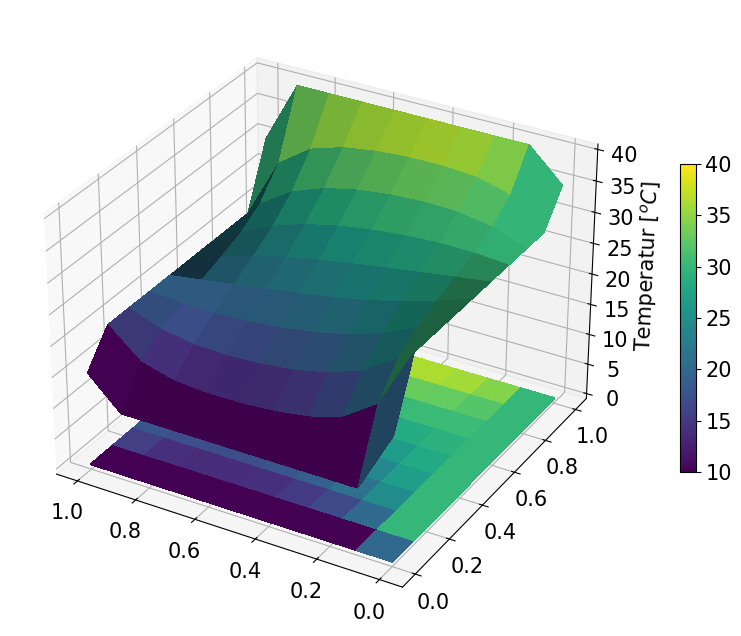

In [9]:
# Temperaturfordeling.m

"""Skript som estimerer temperaturfordelinga

på ei kvadratisk metallplate der temperaturane på
sidekantane er fikserte. Dette gjer den ved å
iterere på temperaturfordelingsmatrisa ved å setje
verdien i kvart element til gjennomsnittet av
nabopunkta. Dette blir gjentatt til dess matrisa
blir praktisk tala uendra ved nye iterasjonar.
"""

# Fikserer kanttemperaturar
T_kant_venstre = 10
T_kant_over = 30
T_kant_hoegre = 40
T_kant_under = 20

# Bestemmer feilmarginen gitt ved normen til matrisa.
tol = 1e-2

# Bestemmer inndelinga (blir lest inn frå kommandolinja)
N = int(input('Kor fin oppdeling vil du ha? '))

#
# Set opp starT_matrisa
#
# Allokerer temperaturmatrisa T_mat og kopi
T_mat = np.zeros((N, N))
T_mat_gml = T_mat.copy()

# Startfordeling med tilfeldige tal frå max til min
Min = np.min(np.array([T_kant_venstre, T_kant_over, 
                       T_kant_hoegre, T_kant_under]))
Max = np.max(np.array([T_kant_venstre, T_kant_over, 
                       T_kant_hoegre, T_kant_under]))
T_mat[1:(N-1),1:(N-1)] = np.ones((N-2,N-2)) * \
    Min+(Max-Min)*np.random.random((N-2,N-2))

# Kantar
T_mat[1:N-1, 0] = T_kant_venstre
T_mat[0, 1:(N-1)] = T_kant_over
T_mat[1:(N-1), N-1] = T_kant_hoegre
T_mat[N-1, 1:(N-1)] = T_kant_under

# Hjørna (gjennomsnitt)
T_mat[0,0] = (T_kant_venstre+T_kant_over)/2
T_mat[0,N-1] = (T_kant_over+T_kant_hoegre)/2
T_mat[N-1,N-1] = (T_kant_hoegre+T_kant_under)/2
T_mat[N-1,0] = (T_kant_under+T_kant_venstre)/2

# Itererer til det sluttar å endre seg
while np.linalg.norm(T_mat-T_mat_gml) > tol:
    T_mat_gml = T_mat.copy()         # Kopierer matrisa
    for r in range(1, N-1):
        for s in range(1, N-1):
            # Omdefinerer temp. til gjennomsnitt
            T_mat[r,s] = (T_mat[r,s-1] + T_mat[r,s+1] + \
                T_mat[r-1,s] + T_mat[r+1,s])/4

# Plottar sluttfordelinga

# FIXME: Quick-fix for å lage det samme plottet (visuelt) 
#        som for MATLAB
T_mat = T_mat.transpose()

# Vektor med verdiar på x- og y-aksane
xy_vektor = np.arange(0, 1 + 1/(N-1) * 0.9, 1/(N-1))

plt.rcParams.update({'font.size': 15})

# Create the meshgrid
X, Y = np.meshgrid(xy_vektor, xy_vektor) 

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(projection='3d')
norm = colors.Normalize(vmin=T_mat.min(), 
                        vmax=T_mat.max())
cmap = plt.cm.viridis
col = cmap(norm(T_mat))
# FIXME: Rutenett-plott
#surf = ax.plot_surface(X, Y, T_mat, 
#                       facecolors=col, linewidth=0, 
#                       antialiased=False, shade=True)
# Overflate-plott
surf = ax.plot_surface(X, Y, T_mat, 
                       facecolors=col, linewidth=0,
                       antialiased=False, shade=True)
# Farge-plott
pcol = ax.plot_surface(X, Y, np.zeros_like(T_mat), 
                       facecolors=col, 
                       shade=False, antialiased=False)
# FIXME: Quick-fix for å lage det samme plottet (visuelt) 
#        som for MATLAB
ax.xaxis.set_inverted(True)
ax.set_zlabel('Temperatur [$^o C$]') # Namn på z-akse

sc = cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sc, ax=ax, shrink=0.5)

plt.show()